In [ ]:
### Total number of employees in the dataset

In [87]:
import pandas as pd

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Get the total number of employees in the dataset
total_employees = df.shape[0]  # shape[0] gives the number of rows
print(f"Total number of employees in the dataset,\nincluding those, who have left: {total_employees}")


Total number of employees in the dataset,
including those, who have left: 2381


Total Number of employees (by gender):

Gender
Male      1404
Female     977
Name: count, dtype: int64


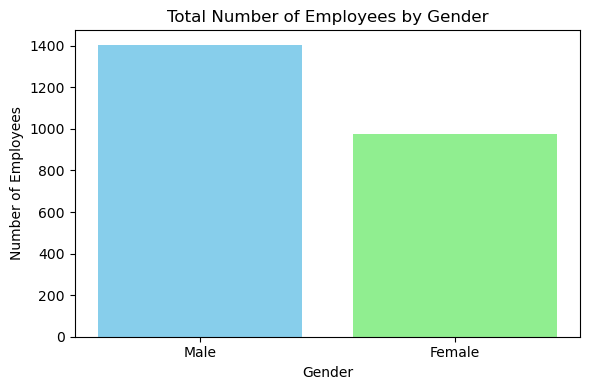

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Get the total number of employees by gender
gender_counts = df['Gender'].value_counts()

# Print the gender counts
print(f"Total Number of employees (by gender):\n\n{gender_counts}")

# Plotting the gender counts in a bar chart
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightgreen'])  # Two bars for male and female
plt.title('Total Number of Employees by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.tight_layout()

# Display the plot
plt.show()


In [142]:
### Employee Status: Still Working vs. Left

Number of employees who have left: 102
Number of employees who are still working: 2279


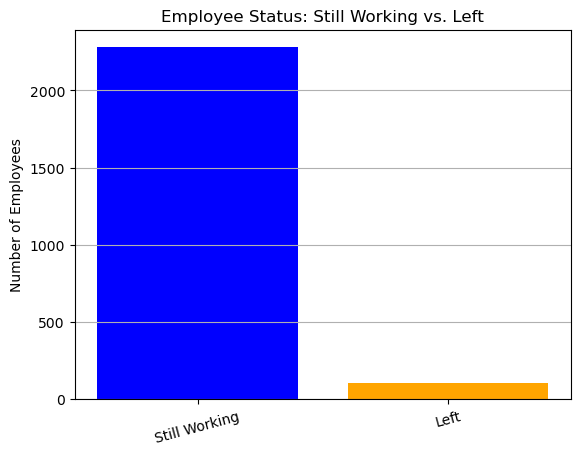

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Define the current date
current_date = pd.to_datetime(datetime.now()).normalize()  # or use '2024-10-01' directly

# Count the number of employees who are still working (Last Working Date >= current_date)
employees_still_working = df[df['Last Working Date'] >= current_date].shape[0]

# Count the number of employees who have left (Last Working Date < current_date)
employees_left = df[df['Last Working Date'] < current_date].shape[0]

# Display the counts
print(f"Number of employees who have left: {employees_left}")
print(f"Number of employees who are still working: {employees_still_working}")

# Create a bar graph
labels = ['Still Working', 'Left']
counts = [employees_still_working, employees_left]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.ylabel('Number of Employees')
plt.title('Employee Status: Still Working vs. Left')
plt.xticks(rotation=15)  # Optional: Rotate x-axis labels for better readability
plt.grid(axis='y')  # Optional: Add a grid to the y-axis
plt.show()



In [ ]:
### Number of Employees Leaving By Year and By Quarterly

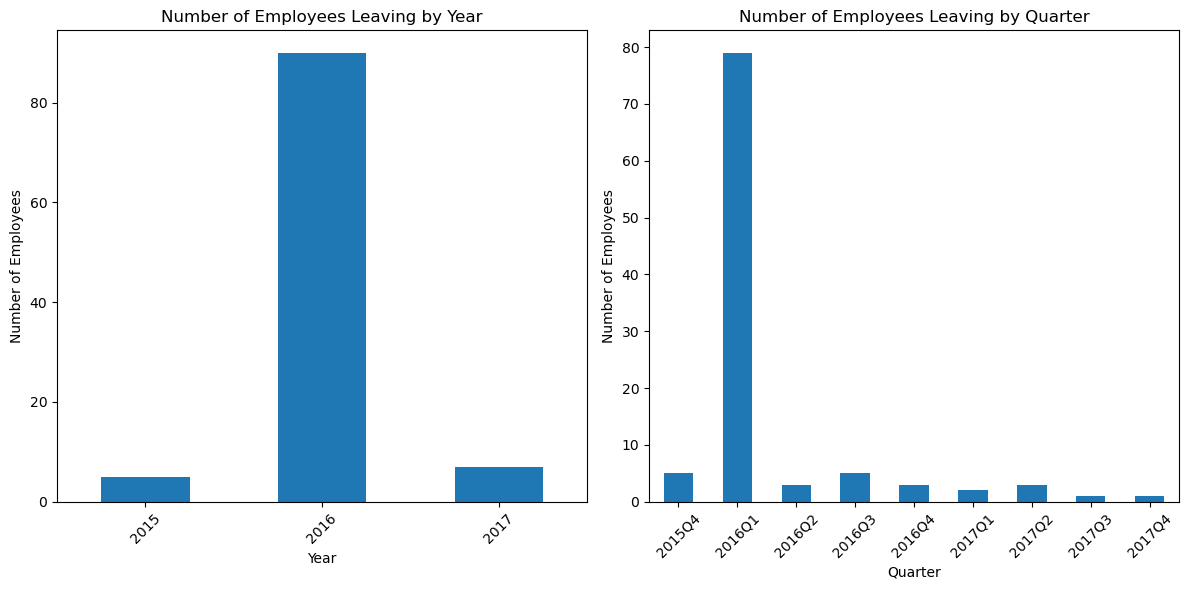

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter out rows where the employee is still working
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Convert the 'Last Working Date' to a datetime format
df_left['Last Working Date'] = pd.to_datetime(df_left['Last Working Date'], errors='coerce')

# Check for NaT values in 'Last Working Date'
invalid_dates = df_left[df_left['Last Working Date'].isna()]

if not invalid_dates.empty:
    print("Invalid dates found:")
    print(invalid_dates[['Last Working Date']])  # Display invalid entries

# If you want to drop rows with invalid dates:
df_left = df_left.dropna(subset=['Last Working Date'])

# Extract the year and quarter from the 'Last Working Date'
df_left['Year'] = df_left['Last Working Date'].dt.year
df_left['Quarter'] = df_left['Last Working Date'].dt.to_period('Q')

# Group by Year and Quarter and count the number of employees who left in each period
attrition_by_year = df_left.groupby('Year').size()
attrition_by_quarter = df_left.groupby('Quarter').size()

# Plot the results to visualize the trends over time
plt.figure(figsize=(12, 6))

# Plot by Year
plt.subplot(1, 2, 1)
attrition_by_year.plot(kind='bar')
plt.title('Number of Employees Leaving by Year')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)

# Plot by Quarter
plt.subplot(1, 2, 2)
attrition_by_quarter.plot(kind='bar')
plt.title('Number of Employees Leaving by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
### Employees Who Left by Age Group and Gender (Big Factor)

Age Group of Employees Who Have Left, by their Gender:
Gender     Female  Male
Age Group              
<25            54    70
25-34         546   819
35-44         329   468
45-54          47    47
55-64           1     0
65+             0     0


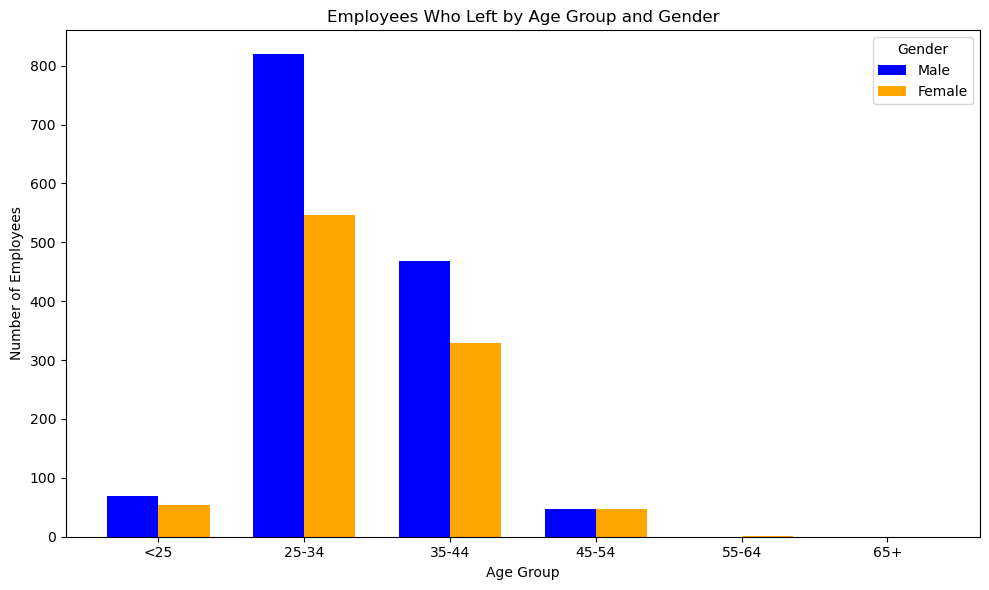

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter for employees who left
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Create age groups
bins = [0, 25, 35, 45, 55, 65, 100]  # Define the age groups
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']  # Labels for the age groups
df_left['Age Group'] = pd.cut(df_left['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and Gender, then count occurrences
age_gender_counts = df_left.groupby(['Age Group', 'Gender'], observed=False).size().unstack(fill_value=0)

# Display the results
print("Age Group of Employees Who Have Left, by their Gender:")
print(age_gender_counts)

# Plotting
# Create an array of bar positions
bar_width = 0.35  # Width of the bars
index = np.arange(len(age_gender_counts.index))  # X positions for each age group

# Create the bars for each gender
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, age_gender_counts['Male'], bar_width, label='Male', color='blue')  # Male bars
bar2 = ax.bar(index + bar_width, age_gender_counts['Female'], bar_width, label='Female', color='orange')  # Female bars

# Adding titles and labels
ax.set_title('Employees Who Left by Age Group and Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Employees')
ax.set_xticks(index + bar_width / 2)  # Position the ticks in the middle of the grouped bars
ax.set_xticklabels(age_gender_counts.index)  # Set the age group labels
ax.legend(title='Gender')

# Tight layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
### Gender Distribution of Employees Who Left the Company

Gender of Employees Who Left the company:

Gender
Male      1404
Female     977
Name: count, dtype: int64


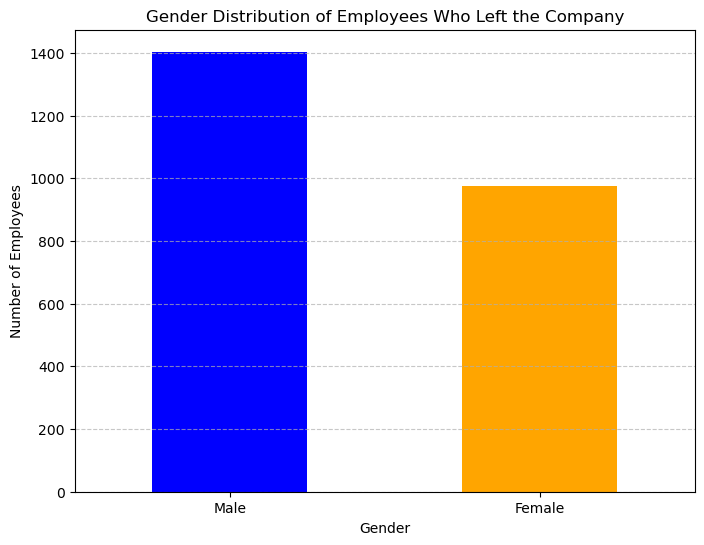

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter for employees who left
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Check if the Gender column is present
if 'Gender' in df_left.columns:
    # Count the number of males and females who have left
    gender_counts = df_left['Gender'].value_counts()

    # Display the counts for employees who left
    print("Gender of Employees Who Left the company:\n")
    print(gender_counts)

    # Plotting the gender distribution
    plt.figure(figsize=(8, 6))
    gender_counts.plot(kind='bar', color=['blue', 'orange'])
    plt.title('Gender Distribution of Employees Who Left the Company')
    plt.xlabel('Gender')
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=0)  # Rotate x labels to be horizontal
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()  # Display the plot
else:
    print("The 'Gender' column is not present in the dataset.")


In [ ]:
### Average Years of Employment

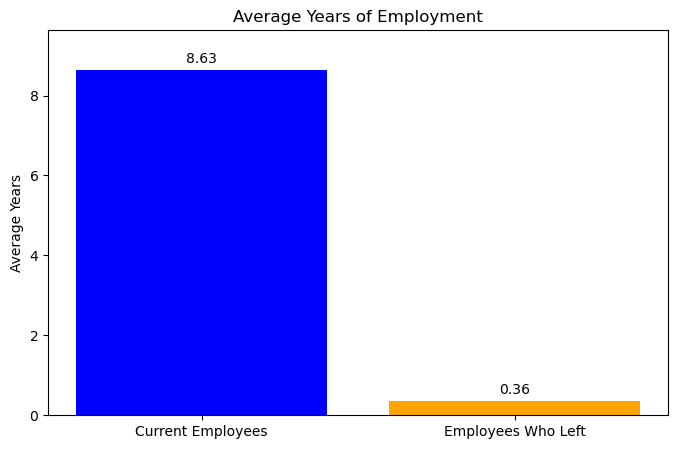

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Convert 'Last Working Date' and 'Date of Joining' to datetime format
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'], errors='coerce')
df['Last Working Date'] = pd.to_datetime(df['Last Working Date'], errors='coerce')

# Define the current date
current_date = pd.to_datetime(datetime.now()).normalize()  # or use '2024-10-01' directly

# Calculate tenure for each employee
df['Tenure (Years)'] = (df['Last Working Date'].where(df['Last Working Date'] < current_date, current_date) - df['Date of Joining']).dt.days / 365.25

# Separate current employees and those who have left
current_employees = df[df['Last Working Date'] >= current_date]
left_employees = df[df['Last Working Date'] < current_date]

# Calculate average tenure for current employees
average_tenure_current = current_employees['Tenure (Years)'].mean()

# Calculate average tenure for employees who have left
average_tenure_left = left_employees['Tenure (Years)'].mean()

# Prepare data for the graph
labels = ['Current Employees', 'Employees Who Left']
averages = [average_tenure_current, average_tenure_left]

# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(labels, averages, color=['blue', 'orange'])
plt.title('Average Years of Employment')
plt.ylabel('Average Years')
plt.ylim(0, max(averages) + 1)  # Add some space above the highest bar
for i, v in enumerate(averages):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom')  # Add data labels above bars

plt.show()


In [ ]:
### Salary Range of Employees Who Have Left by Gender (Big Factor)

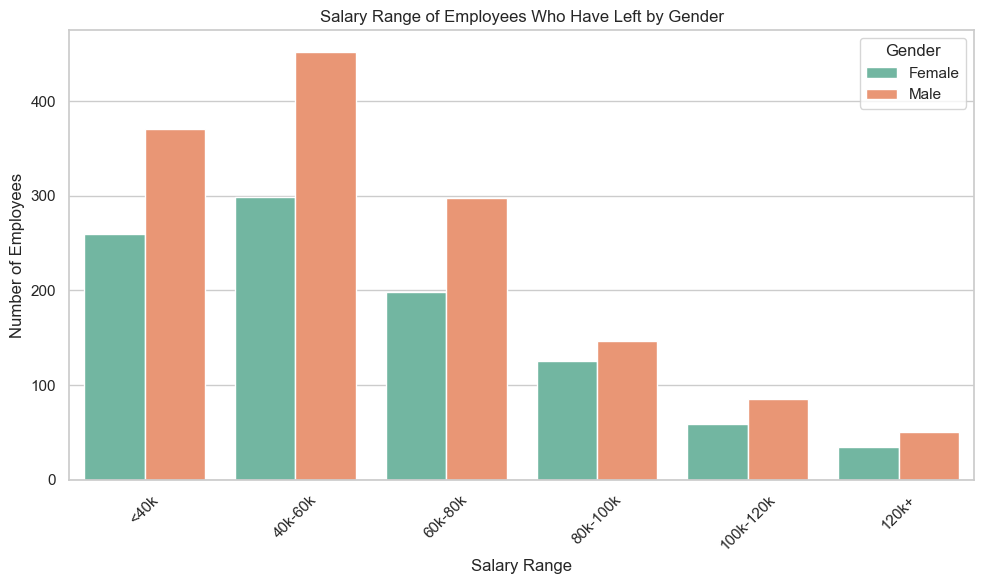

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter for employees who left
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Create salary ranges (bins)
bins = [0, 40000, 60000, 80000, 100000, 120000, float('inf')]  # Define the salary bins
labels = ['<40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k+']  # Labels for the salary ranges

# Assign the salary range to a new column
df_left['Salary Range'] = pd.cut(df_left['Salary'], bins=bins, labels=labels, right=False)

# Group by Salary Range and Gender, and count occurrences
salary_gender_counts = df_left.groupby(['Salary Range', 'Gender'], observed=False).size().reset_index(name='Count')

# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary Range', y='Count', hue='Gender', data=salary_gender_counts, palette='Set2')

# Adding title and labels
plt.title('Salary Range of Employees Who Have Left by Gender')
plt.xlabel('Salary Range')
plt.ylabel('Number of Employees')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Gender')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
### Average Tenure of Employees in the company by their Gender

Average Tenure of Employees in the company by their Gender:

   Gender  Tenure (Years)
0  Female            8.35
1    Male            8.23


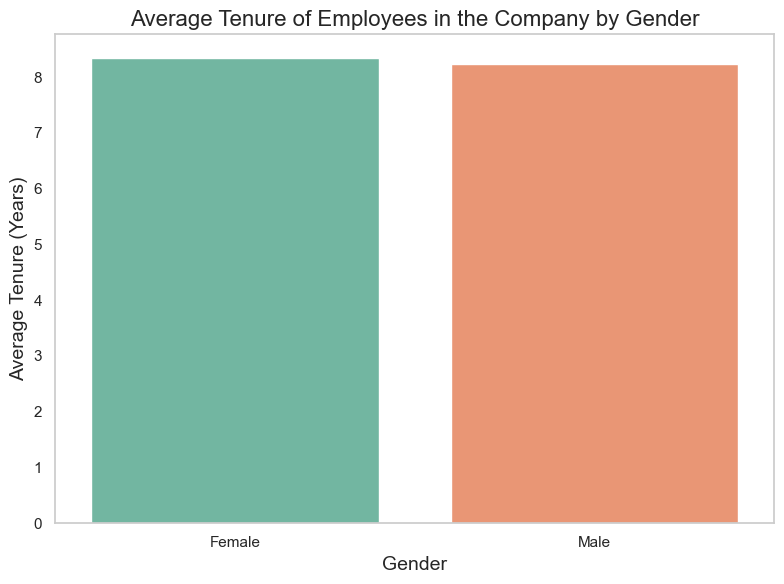

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter for employees who left
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Convert 'Joining Date' and 'Last Working Date' to datetime format
df_left['Date of Joining'] = pd.to_datetime(df_left['Date of Joining'], errors='coerce')
df_left['Last Working Date'] = pd.to_datetime(df_left['Last Working Date'], errors='coerce')

# Calculate the tenure in total years with decimal
df_left['Tenure (Years)'] = (df_left['Last Working Date'] - df_left['Date of Joining']).dt.days / 365.25

# Group by Gender and calculate the mean tenure in years
tenure_by_gender = df_left.groupby('Gender')['Tenure (Years)'].mean().reset_index()

# Round the tenure values to 2 decimal places
tenure_by_gender['Tenure (Years)'] = tenure_by_gender['Tenure (Years)'].round(2)

# Display the results
print("Average Tenure of Employees in the company by their Gender:\n")
print(tenure_by_gender)

# Plotting the average tenure by gender using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Tenure (Years)', data=tenure_by_gender, palette='Set2')

# Adding title and labels
plt.title('Average Tenure of Employees in the Company by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Tenure (Years)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the grid for better readability
plt.grid(axis='y')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
### Number of Employees Who Left by Education Level

Number of Employees Who Left by Education Level:

  Education Level  Number of Employees Left
0          Master                       802
1        Bachelor                       795
2         College                       784


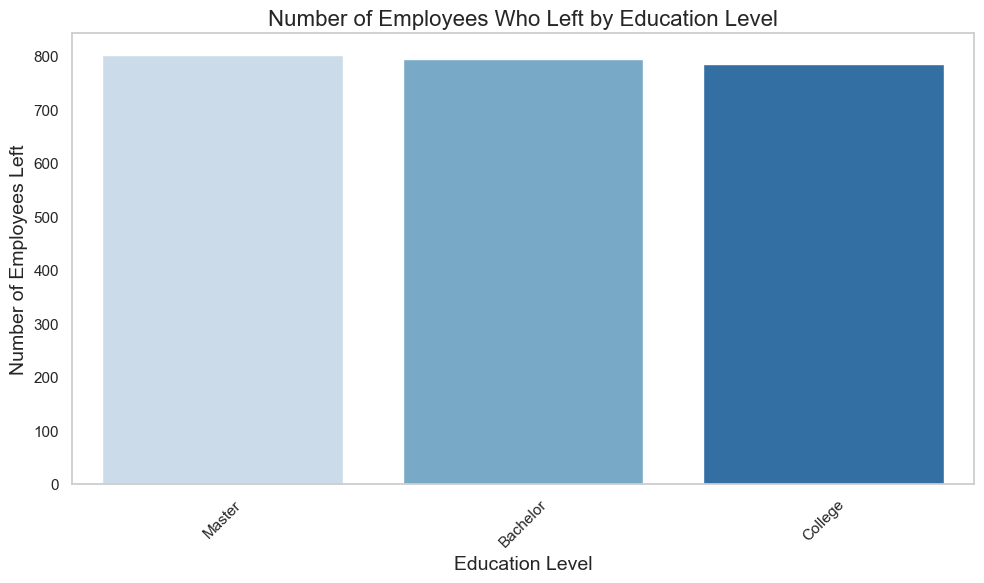

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter for employees who left
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Count the number of employees who left by Education Level
education_counts = df_left['Education Level'].value_counts().reset_index()
education_counts.columns = ['Education Level', 'Number of Employees Left']

# Display the results
print("Number of Employees Who Left by Education Level:\n")
print(education_counts)

# Plotting the number of employees who left by education level using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Number of Employees Left', data=education_counts, palette='Blues')

# Adding title and labels
plt.title('Number of Employees Who Left by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Number of Employees Left', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the grid for better readability
plt.grid(axis='y')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
### Number of Employees Who Have Left by City & State (Big Factor)

Number of Employees Who Have Left by City:

City
Shreveport      152
Augusta         101
Spartanburg      96
Charleston       93
Raleigh          89
Columbia         89
Durham           86
Savannah         84
Nashville        82
Orlando          82
Greenville       82
Montgomery       81
Detroit          80
Miami            80
Lafayette        79
Atlanta          79
Lansing          78
Jacksonville     77
Charlotte        76
Greensboro       75
Chattanooga      74
Memphis          74
Knoxville        73
New Orleans      72
Tampa            72
Columbus         71
Huntsville       71
Macon            69
Birmingham       64
Name: count, dtype: int64


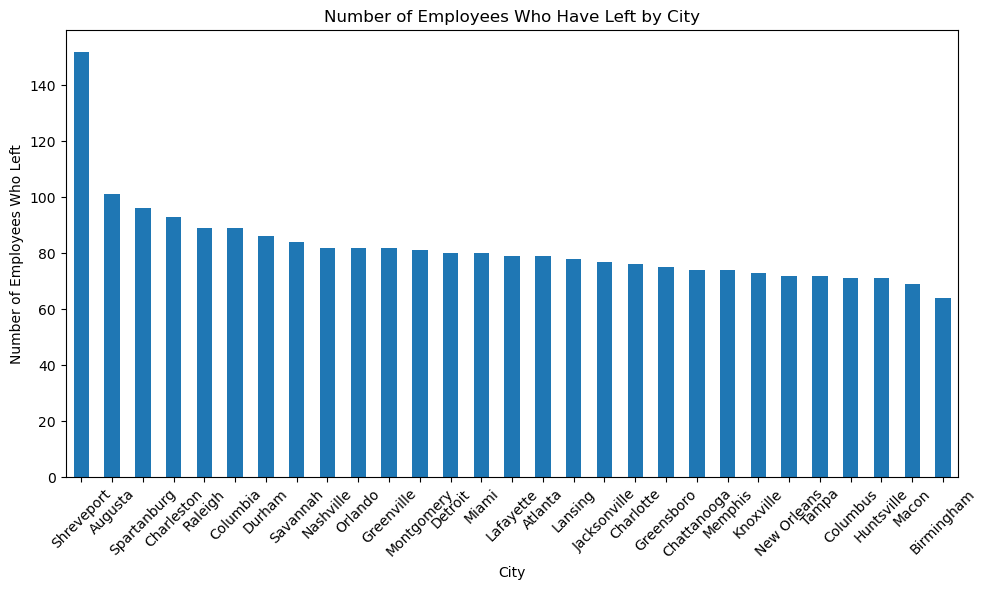


Number of Employees Who Have Left by State:

State
 GA    404
 SC    360
 NC    326
 FL    311
 TN    303
 LA    303
 AL    216
 MI    158
Name: count, dtype: int64


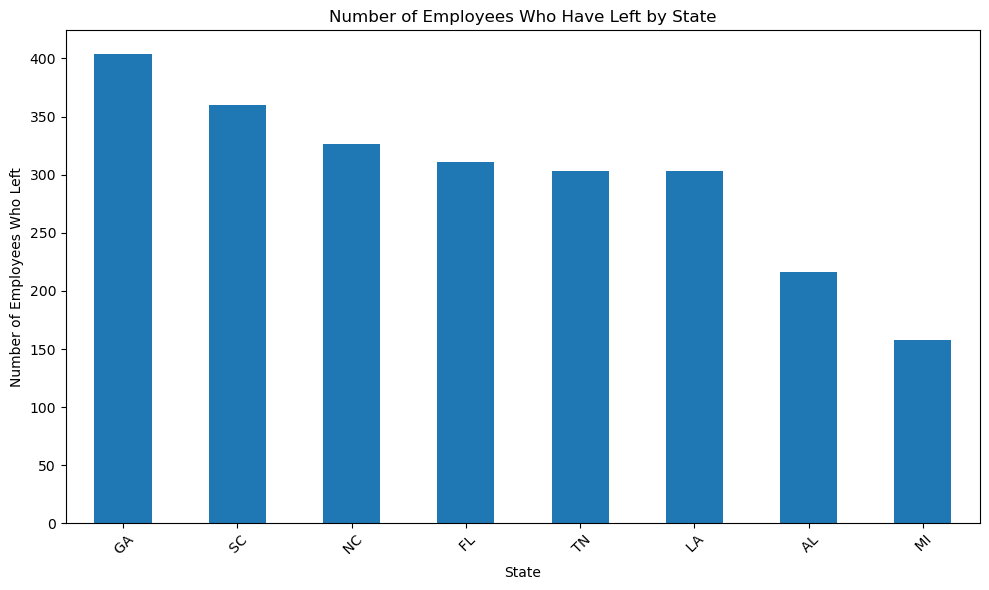

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter for employees who left
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Group by City and count occurrences
location_counts = df_left['City'].value_counts()

# Display the results
print("Number of Employees Who Have Left by City:\n")
print(location_counts)

# Plot the results
location_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Employees Who Have Left by City')
plt.xlabel('City')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Alternatively, you can group by State if needed
state_counts = df_left['State'].value_counts()

# Display the results for State
print("\nNumber of Employees Who Have Left by State:\n")
print(state_counts)

# Plot the results for State
state_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Employees Who Have Left by State')
plt.xlabel('State')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [ ]:
### Number of Employees Who Have Left by Quarterly Rating (Big Factor)

Number of Employees Who Have Left by Quarterly Rating:

Quarterly Rating
1    1649
2     411
3     216
4     105
Name: count, dtype: int64


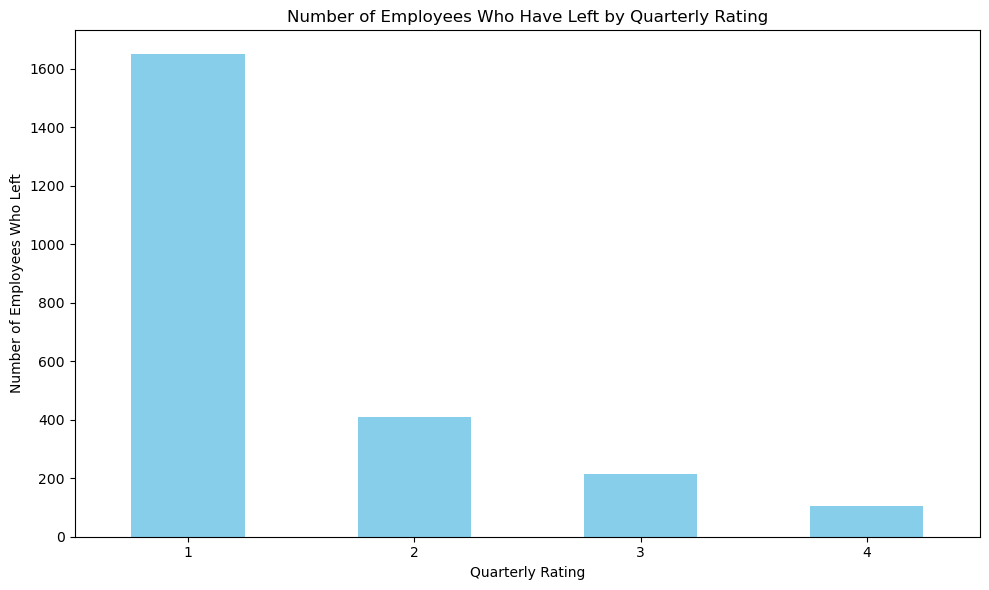

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter for employees who left
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Group by Quarterly Rating and count occurrences
rating_counts = df_left['Quarterly Rating'].value_counts().sort_index()

# Display the results
print("Number of Employees Who Have Left by Quarterly Rating:\n")
print(rating_counts)

# Plot the results
rating_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Employees Who Have Left by Quarterly Rating')
plt.xlabel('Quarterly Rating')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [ ]:
### Number of Employees Who Left by Total Business Value Range (Big Factor)

Number of Employees Who Have Left by Total Business Value Range:

Business Value Range
<50k         1575
50k-100k       16
100k-150k      81
150k-200k      23
200k-250k      70
250k-300k      51
300k+         559
Name: count, dtype: int64


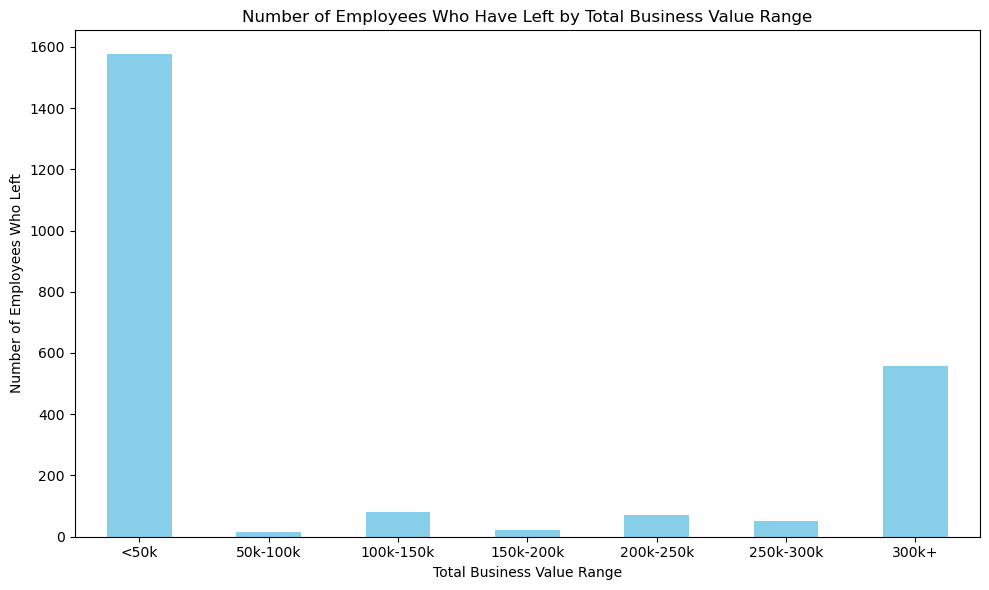

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter for employees who left
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Group by Total Business Value and count occurrences
# You might want to create bins for better visualization if the range is large
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, float('inf')]  # Define bins
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k+']  # Labels for the bins
df_left['Business Value Range'] = pd.cut(df_left['Total Business Value'], bins=bins, labels=labels, right=False)

# Count the number of employees who left in each business value range
business_value_counts = df_left['Business Value Range'].value_counts().sort_index()

# Display the results
print("Number of Employees Who Have Left by Total Business Value Range:\n")
print(business_value_counts)

# Plot the results
business_value_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Employees Who Have Left by Total Business Value Range')
plt.xlabel('Total Business Value Range')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [ ]:
### Number of Employees Who Have Left by Joining Designation & Last Designation (Big Factor)

Number of Employees Who Have Left by Joining Designation:

   Joining Designation  Number of Employees Left
0                    1                      1026
1                    2                       815
2                    3                       493
3                    4                        36
4                    5                        11

Number of Employees Who Have Left by Designation:

   Last Designation  Number of Employees Left
0                 2                       866
1                 1                       751
2                 3                       611
3                 4                       132
4                 5                        21


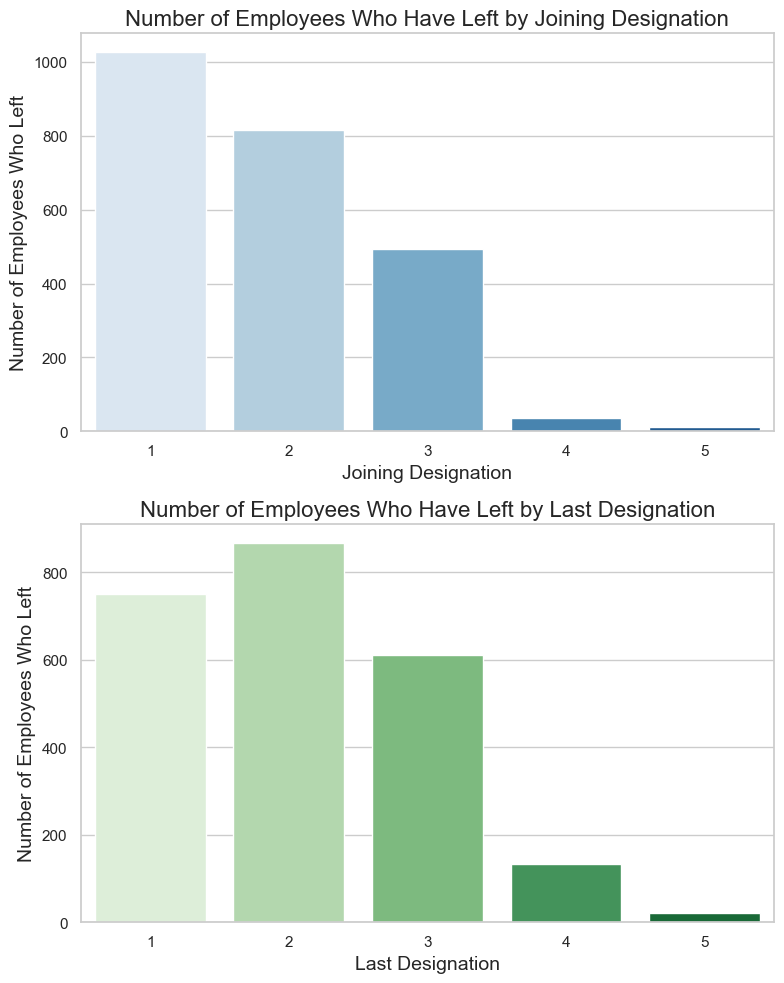

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Filter for employees who left
df_left = df[df['Last Working Date'] != 'Still Working'].copy()

# Group by Joining Designation and count occurrences
joining_designation_counts = df_left['Joining Designation'].value_counts().reset_index()
joining_designation_counts.columns = ['Joining Designation', 'Number of Employees Left']

last_designation_counts = df_left['Last Designation'].value_counts().reset_index()
last_designation_counts.columns = ['Last Designation', 'Number of Employees Left']

# Display the results
print("Number of Employees Who Have Left by Joining Designation:\n")
print(joining_designation_counts)
print("\nNumber of Employees Who Have Left by Designation:\n")
print(last_designation_counts)

# Plotting the results using Seaborn
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot for Joining Designation
sns.barplot(x='Joining Designation', y='Number of Employees Left', data=joining_designation_counts, ax=ax[0], palette='Blues')
ax[0].set_title('Number of Employees Who Have Left by Joining Designation', fontsize=16)
ax[0].set_xlabel('Joining Designation', fontsize=14)
ax[0].set_ylabel('Number of Employees Who Left', fontsize=14)
ax[0].tick_params(axis='x', rotation=0)

# Plot for Last Designation
sns.barplot(x='Last Designation', y='Number of Employees Left', data=last_designation_counts, ax=ax[1], palette='Greens')
ax[1].set_title('Number of Employees Who Have Left by Last Designation', fontsize=16)
ax[1].set_xlabel('Last Designation', fontsize=14)
ax[1].set_ylabel('Number of Employees Who Left', fontsize=14)
ax[1].tick_params(axis='x', rotation=0)

plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [ ]:
### Comparison of Predicted vs Actual Employee Departures

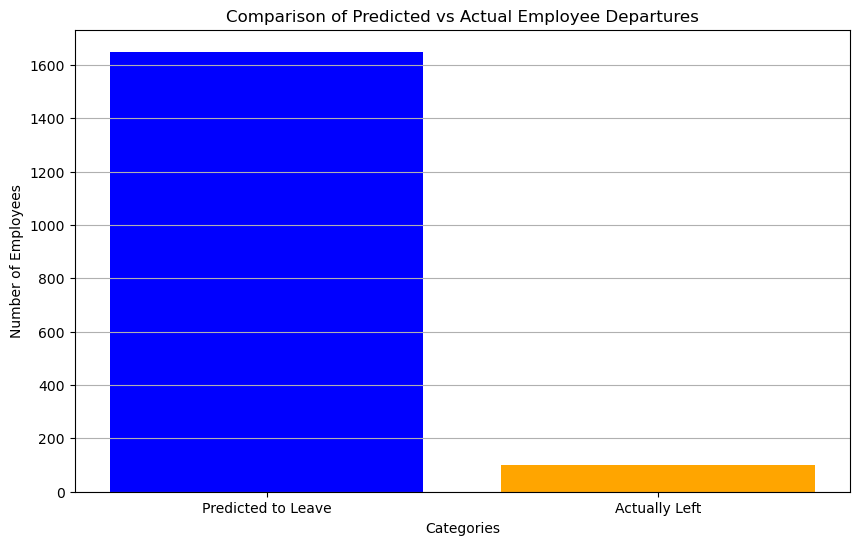

Number of employees predicted to leave: 1649
Number of employees who actually left: 102


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Define criteria for predicting employees likely to leave
performance_threshold = 2  # Change this value based on your criteria
predicted_leavers = df[df['Quarterly Rating'] < performance_threshold]

# Count predicted leavers
num_predicted_leavers = predicted_leavers.shape[0]

# Count actual leavers
actual_leavers = df[df['Last Working Date'] < pd.to_datetime(datetime.now()).normalize()]
num_actual_leavers = actual_leavers.shape[0]

# Prepare data for the bar chart
labels = ['Predicted to Leave', 'Actually Left']
values = [num_predicted_leavers, num_actual_leavers]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Comparison of Predicted vs Actual Employee Departures')
plt.xlabel('Categories')
plt.ylabel('Number of Employees')
plt.grid(axis='y')

# Show the plot
plt.show()

# Print results
print(f"Number of employees predicted to leave: {num_predicted_leavers}")
print(f"Number of employees who actually left: {num_actual_leavers}")


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Convert 'Last Working Date' to a binary variable indicating if the employee has left
df['Attrition'] = (df['Last Working Date'] < pd.to_datetime(datetime.now()).normalize()).astype(int)

# Convert 'Last Working Date' and 'Date of Joining' to datetime format
df['Last Working Date'] = pd.to_datetime(df['Last Working Date'], errors='coerce')

# Select relevant features (excluding Gender)
features = [
    'Age', 'Salary', 
    'Quarterly Rating', 
    'Joining Designation', 'Last Designation', 'Total Business Value'
]

# Prepare features and target variable
X = df[features]
y = df['Attrition']

# One-hot encode categorical variables (if applicable)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))



              precision    recall  f1-score   support

           0       0.96      0.99      0.97       684
           1       0.00      0.00      0.00        31

    accuracy                           0.95       715
   macro avg       0.48      0.50      0.49       715
weighted avg       0.91      0.95      0.93       715

[[679   5]
 [ 31   0]]


In [ ]:
### Top Features in Predicting Attrition (actionable recommendations)

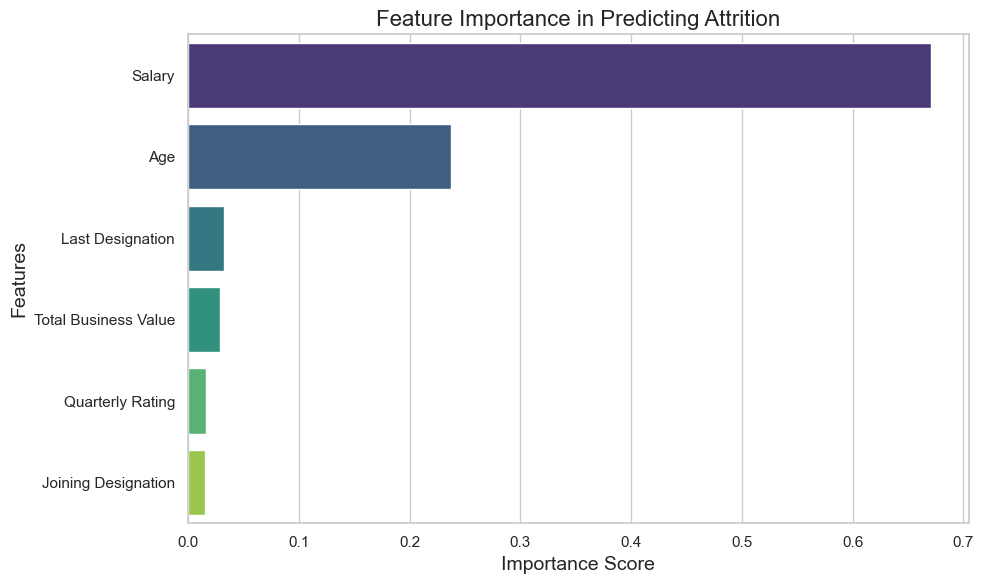

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your trained model and 'X' is your feature DataFrame
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance Score', ascending=False)

# Plotting feature importance using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance Score', y='Features', data=importance_df, palette='viridis')

# Adding title and labels
plt.title("Feature Importance in Predicting Attrition", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


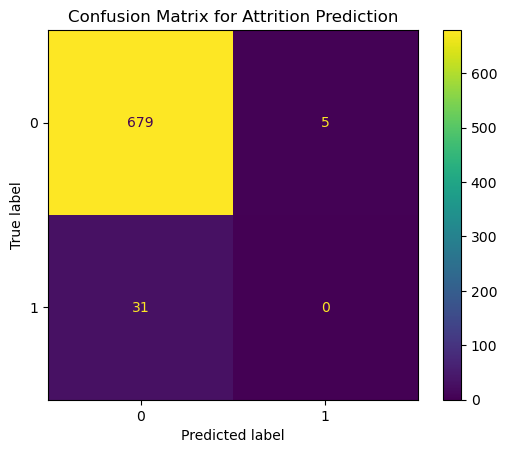

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix visualization
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()
plt.title("Confusion Matrix for Attrition Prediction")
plt.show()


In [ ]:
###  Employee Attrition Forecast for the Next 12 Months

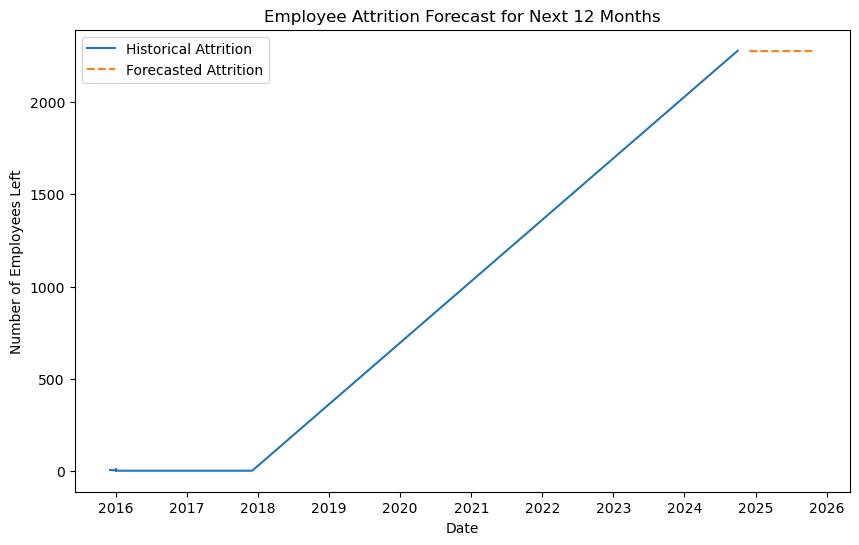

Estimated total number of employees predicted to leave in the next 12 months: 27324


In [26]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset from the provided file path
file_path = 'Downloads/HR_Dataset (#).xlsx'
df = pd.read_excel(file_path)

# Convert 'Last Working Date' to datetime to handle time-based forecasting
df['Last Working Date'] = pd.to_datetime(df['Last Working Date'])

# Filter employees who have left (i.e., those with a valid Last Working Date)
df_left = df[df['Last Working Date'] < pd.to_datetime('today')]

# Group by the last working date to count the number of employees leaving on each date
attrition_data = df_left.groupby('Last Working Date').size().reset_index(name='Employees Left')

# Set the 'Last Working Date' as the index for time-series modeling
attrition_data.set_index('Last Working Date', inplace=True)

# Ensure frequency information is present (monthly frequency 'M')
attrition_data.index = attrition_data.index.to_period('M')

# Build the ARIMA model (p,d,q parameters can be tuned based on data analysis)
model = ARIMA(attrition_data['Employees Left'], order=(2,1,2))
arima_result = model.fit()

# Forecasting for the next 12 months (1 year)
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

# Generate future date range for the forecasted data
future_dates = pd.date_range(start=attrition_data.index[-1].to_timestamp(), periods=forecast_steps+1, freq='M')[1:]

# Plot the historical data along with the forecast
plt.figure(figsize=(10, 6))
plt.plot(attrition_data.index.to_timestamp(), attrition_data['Employees Left'], label='Historical Attrition')
plt.plot(future_dates, forecast, label='Forecasted Attrition', linestyle='--')
plt.title('Employee Attrition Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Number of Employees Left')
plt.legend()
plt.show()

# Calculate the total number of forecasted employees expected to leave in the next 12 months
total_forecasted_attrition = forecast.sum()
print(f"Estimated total number of employees predicted to leave in the next 12 months: {total_forecasted_attrition:.0f}")
